In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")

assert(heart_disease.isna().sum().sum() == 0)

In [3]:
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

np.random.seed(22)
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier()

# Basic ways to evaluate SciKit Learn models

- Estimator `score` method
- `cross_val_score`

## Using `score`

In [4]:
model.score(X_TEST, Y_TEST)

0.7868852459016393

## Using `cross_val_score()`

In [5]:
from sklearn.model_selection import cross_val_score

# Reusing the Classification model above
model = RandomForestClassifier()
model.fit(X_TRAIN, Y_TRAIN)
model.score(X_TEST, Y_TEST)

0.7704918032786885

In [6]:
cross_val = cross_val_score(model, X, Y)

In [7]:
cross_val

array([0.80327869, 0.86885246, 0.78688525, 0.85      , 0.78333333])

In [8]:
cross_val.mean()

0.8184699453551912

# Evaluating the heart disease CLASSIFICAITON model

1. Accuracy
2. Area Uncer ROC curve
3. Confusion matrix
4. Classification report

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
# setting up model for demonstration

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

np.random.seed(22)
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier()

In [11]:
cross_val = cross_val_score(model, X, Y)
cross_val

array([0.81967213, 0.90163934, 0.83606557, 0.8       , 0.78333333])

## Accuracy

In [12]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {cross_val.mean() * 100 :.2f} %")

Heart Disease Classifier Cross-Validated Accuracy : 82.81 %


## Area Under ROC Curve

ROC curves are a comparison of a models true positive rate (TPR) vs false positive rate (FPR)

* True positive : model predicts 1 when the actual value is 1
* False positive : model predicts 1 when the actual value is 0
* True negaive: model predicts 0 when the actual value is 0
* False negative : model predicts 0 when the actual value is 1

In [13]:
from sklearn.metrics import roc_curve

In [14]:
# setting up model for demonstration

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

np.random.seed(22)
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier()

In [15]:
y_probs = model.predict_proba(X_TEST)

In [16]:
y_probs[:10]

array([[0.38, 0.62],
       [0.07, 0.93],
       [0.18, 0.82],
       [0.88, 0.12],
       [0.05, 0.95],
       [0.28, 0.72],
       [0.2 , 0.8 ],
       [0.84, 0.16],
       [0.99, 0.01],
       [0.27, 0.73]])

In [17]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.62, 0.93, 0.82, 0.12, 0.95, 0.72, 0.8 , 0.16, 0.01, 0.73, 0.94,
       0.99, 0.49, 0.75, 0.87, 0.87, 0.97, 0.  , 0.77, 0.43, 0.99, 0.11,
       0.84, 0.23, 0.38, 0.83, 0.98, 1.  , 0.  , 0.07, 0.72, 0.27, 0.59,
       0.3 , 0.91, 0.07, 0.22, 0.79, 0.62, 0.64, 0.53, 0.81, 1.  , 0.28,
       0.71, 0.42, 0.18, 0.98, 0.31, 0.69, 0.17, 0.59, 0.22, 0.44, 0.02,
       0.18, 0.77, 0.52, 0.68, 0.91, 0.88])

In [18]:
fpr, tpr, thresh = roc_curve(Y_TEST, y_probs_positive)

In [19]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.03703704, 0.07407407,
       0.07407407, 0.07407407, 0.11111111, 0.11111111, 0.14814815,
       0.14814815, 0.18518519, 0.25925926, 0.2962963 , 0.2962963 ,
       0.40740741, 0.40740741, 0.55555556, 0.62962963, 0.77777778,
       0.85185185, 0.92592593, 1.        ])

In [20]:
# Creating a function for plotting ROC curve

def plot_roc(fpr, tpr):
    """
    Plots a ROC curve using fpr and tpr
    """
    
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    plt.plot([0, 1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC")
    
    plt.legend()
    plt.show()

### An ROC curve actually just shows the probability

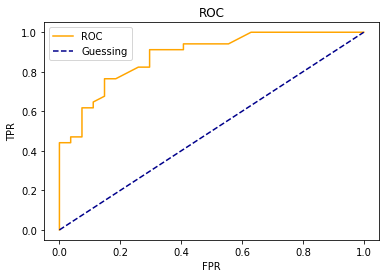

In [21]:
# our ROC curve
plot_roc(fpr, tpr)

In [22]:
# area under roc

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_TEST, y_probs_positive)

0.8818082788671023

## Confusion Matrix

A quick way to compare the model's predictions and the actual values it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
# setting up model for demonstration

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

np.random.seed(22)
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier()

In [25]:
y_preds = model.predict(X_TEST)
y_preds

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [26]:
matrix = confusion_matrix(Y_TEST, y_preds)

In [27]:
# visualizing confusion matrix with pd.crosstab()

pd.crosstab(Y_TEST, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"]) 

Predicted Labels,0,1
Actual Labels,,
0,19,8
1,5,29


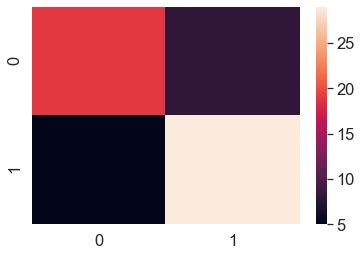

In [28]:
# visualizing confusion matrix with seaborn.heatmap
import seaborn as sns

sns.set(font_scale=1.5) 

matrix = confusion_matrix(Y_TEST, y_preds)

sns.heatmap(matrix);

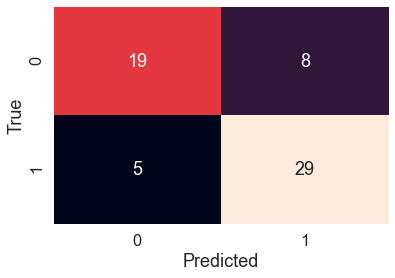

In [29]:
# customizing the heatmap

matrix = confusion_matrix(Y_TEST, y_preds)


def plot_matrix(matrix):
    """
    Plot confusion matric using seaborn
    """
    fig, ax = plt.subplots()
    ax = sns.heatmap(matrix, annot=True, cbar=False)
    
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
plot_matrix(matrix)

## Classification Report

In [30]:
# setting up model for demonstration

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

np.random.seed(22)
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier()

In [31]:
y_preds = model.predict(X_TEST)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(Y_TEST, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.78      0.85      0.82        34

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



# Evaluating the heart disease REGRESSION model

1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston_df = pd.DataFrame(load_boston()["data"], columns=load_boston()["feature_names"])
boston_df["target"] = load_boston()["target"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
np.random.seed(22)

X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_TRAIN, Y_TRAIN)

RandomForestRegressor()

In [49]:
model.score(X_TEST, Y_TEST)

0.8187903792595235

## r2 Score

In [134]:
from sklearn.metrics import r2_score

In [135]:
y_preds = model.predict(X_TEST)

In [136]:
r2_score(Y_TEST, y_preds)

0.8187903792595235

## Mean Absolute Error (MAE)

It tells you how off your predictions are 

In [137]:
from sklearn.metrics import mean_absolute_error

mea = mean_absolute_error(Y_TEST, y_preds)

mea

2.521303921568626

In [138]:
mae_df = pd.DataFrame({"actual values": Y_TEST, "predicted": y_preds})

In [139]:
mae_df.head()

,actual values,predicted
503,23.9,28.029
178,29.9,28.534
494,24.5,20.574
222,27.5,25.192
28,18.4,20.905


In [140]:
mae_df["differences"] = mae_df["actual values"] - mae_df["predicted"]

In [141]:
mae_df.head()

,actual values,predicted,differences
503,23.9,28.029,-4.129
178,29.9,28.534,1.366
494,24.5,20.574,3.926
222,27.5,25.192,2.308
28,18.4,20.905,-2.505


In [142]:
# alternative
pd.DataFrame(np.concatenate((np.array(Y_TEST).reshape(-1,1), y_preds.reshape(-1, 1)), axis=1), columns=["actual values", "predicted"])

,actual values,predicted
0,23.9,28.029
1,29.9,28.534
2,24.5,20.574
3,27.5,25.192
4,18.4,20.905
...,...,...
97,11.7,12.963
98,16.7,16.121
99,22.0,27.444
100,13.3,15.646


## Mean Squared Error (MSE)

In [144]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_TEST, y_preds)
mse

16.067420245098024

# Using Scoring Paramenter

In [145]:
from sklearn.model_selection import cross_val_score

In [146]:
# setting up model for demonstration

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

np.random.seed(22)
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier()

In [152]:
np.random.seed(22)
cv_acc = cross_val_score(model, X ,Y, cv=5)

In [153]:
cv_acc

array([0.83606557, 0.8852459 , 0.78688525, 0.83333333, 0.75      ])

In [154]:
print(f"Cross Validated Accuracy is {cv_acc.mean() * 100 :.2f} %")

Cross Validated Accuracy is 81.83 %


In [155]:
np.random.seed(22)

cv_acc = cross_val_score(model, X ,Y, cv=5, scoring="accuracy")
print(f"Cross Validated Accuracy is {cv_acc.mean() * 100 :.2f} %")

Cross Validated Accuracy is 81.83 %


In [156]:
cv_precision = cross_val_score(model, X, Y, scoring="precision")
print(f"Cross Validated Precision is {cv_precision.mean() * 100 :.2f} %")

Cross Validated Precision is 82.85 %


In [157]:
cv_recall = cross_val_score(model, X, Y, scoring="recall")
print(f"Cross Validated Recall is {cv_recall.mean() * 100 :.2f} %")

Cross Validated Recall is 84.24 %


In [158]:
cv_f1 = cross_val_score(model, X, Y, scoring="f1")
print(f"Cross Validated F1 is {cv_f1.mean() * 100 :.2f} %")

Cross Validated F1 is 84.71 %


NOTE: YOU CAN EVALUATE A REGRESSING MODEL THE SAME WAY

# Using Metric Functions

In [159]:
np.random.seed(22)

X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_TRAIN, Y_TRAIN)

RandomForestRegressor()

In [162]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_preds = model.predict(X_TEST)

print("Evaluating Regressing Model")
print(f"R2: {r2_score(Y_TEST, y_preds)}")
print(f"MAE: {mean_absolute_error(Y_TEST, y_preds)}")
print(f"MSE: {mean_squared_error(Y_TEST, y_preds)}")

Evaluating Regressing Model
R2: 0.8187903792595235
MAE: 2.521303921568626
MSE: 16.067420245098024
